In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

kanser = pd.read_csv("data.csv")
print(kanser.shape)
kanser.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
kanser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

C:\Users\korkm\AppData\Local\Temp\ipykernel_19512\1529282928.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(kanser['diagnosis'], label='count',palette='pastel')


diagnosis
B    357
M    212
Name: count, dtype: int64


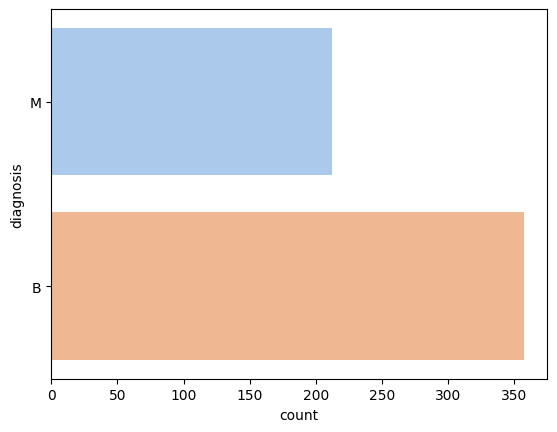

In [3]:
sns.countplot(kanser['diagnosis'], label='count',palette='pastel')
print(kanser['diagnosis'].value_counts())

In [4]:
kanser.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
kanser.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
M = kanser[kanser.diagnosis=="M"]
B = kanser[kanser.diagnosis=="B"]

In [7]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 567
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       212 non-null    int64  
 1   diagnosis                212 non-null    object 
 2   radius_mean              212 non-null    float64
 3   texture_mean             212 non-null    float64
 4   perimeter_mean           212 non-null    float64
 5   area_mean                212 non-null    float64
 6   smoothness_mean          212 non-null    float64
 7   compactness_mean         212 non-null    float64
 8   concavity_mean           212 non-null    float64
 9   concave points_mean      212 non-null    float64
 10  symmetry_mean            212 non-null    float64
 11  fractal_dimension_mean   212 non-null    float64
 12  radius_se                212 non-null    float64
 13  texture_se               212 non-null    float64
 14  perimeter_se             212 no

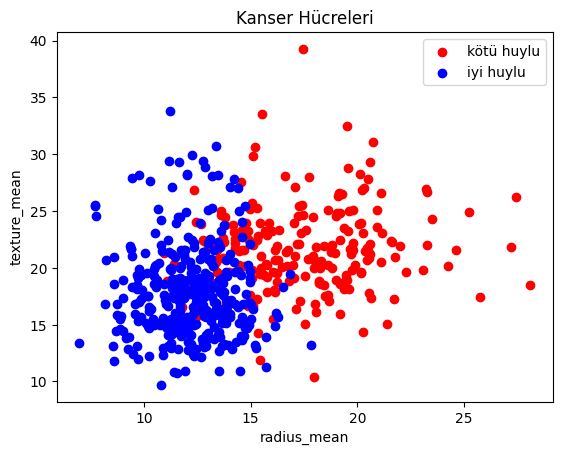

In [8]:
plt.title("Kanser Hücreleri")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kötü huylu")
plt.scatter(B.radius_mean,B.texture_mean, color="blue",label="iyi huylu")
plt.legend()
plt.show()

In [9]:
kanser.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [10]:
feature_columns = ['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean',
'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se',
'area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',
'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst', 'concavity_worst',
'concave points_worst','symmetry_worst', 'fractal_dimension_worst',]
kanser.diagnosis=[1 if x=="M" else 0 for x in kanser.diagnosis]
kanser.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [11]:
kanser1= kanser.drop(["id","Unnamed: 32","diagnosis"],axis=1)
kanser1.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
x_train,x_test, y_train,y_test= train_test_split(kanser1,kanser.diagnosis,test_size=0.2,random_state=21)

In [13]:
print(y_test)

550    0
147    0
4      1
77     1
339    1
      ..
212    1
446    1
529    0
175    0
172    1
Name: diagnosis, Length: 114, dtype: int64


In [14]:
tree = DecisionTreeClassifier()
model = tree.fit(x_train, y_train)

In [15]:
model.score(x_test,y_test)

0.9210526315789473

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
tahmin_tree = model.predict(x_test)
precision_tree = precision_score(y_test, tahmin_tree)
recall_tree = recall_score(y_test, tahmin_tree)
f1_tree = f1_score(y_test, tahmin_tree)
error_rate_tree = 1 - accuracy_score(y_test, tahmin_tree)

print("\nKarar Ağacı Modeli Hata Metrikleri:")
print("Hassasiyet:", precision_tree)
print("Özgüllük:", recall_tree)
print("F1 Skoru:", f1_tree)
print("Hata Oranı:", error_rate_tree)


Karar Ağacı Modeli Hata Metrikleri:
Hassasiyet: 0.8947368421052632
Özgüllük: 0.8717948717948718
F1 Skoru: 0.8831168831168831
Hata Oranı: 0.07894736842105265


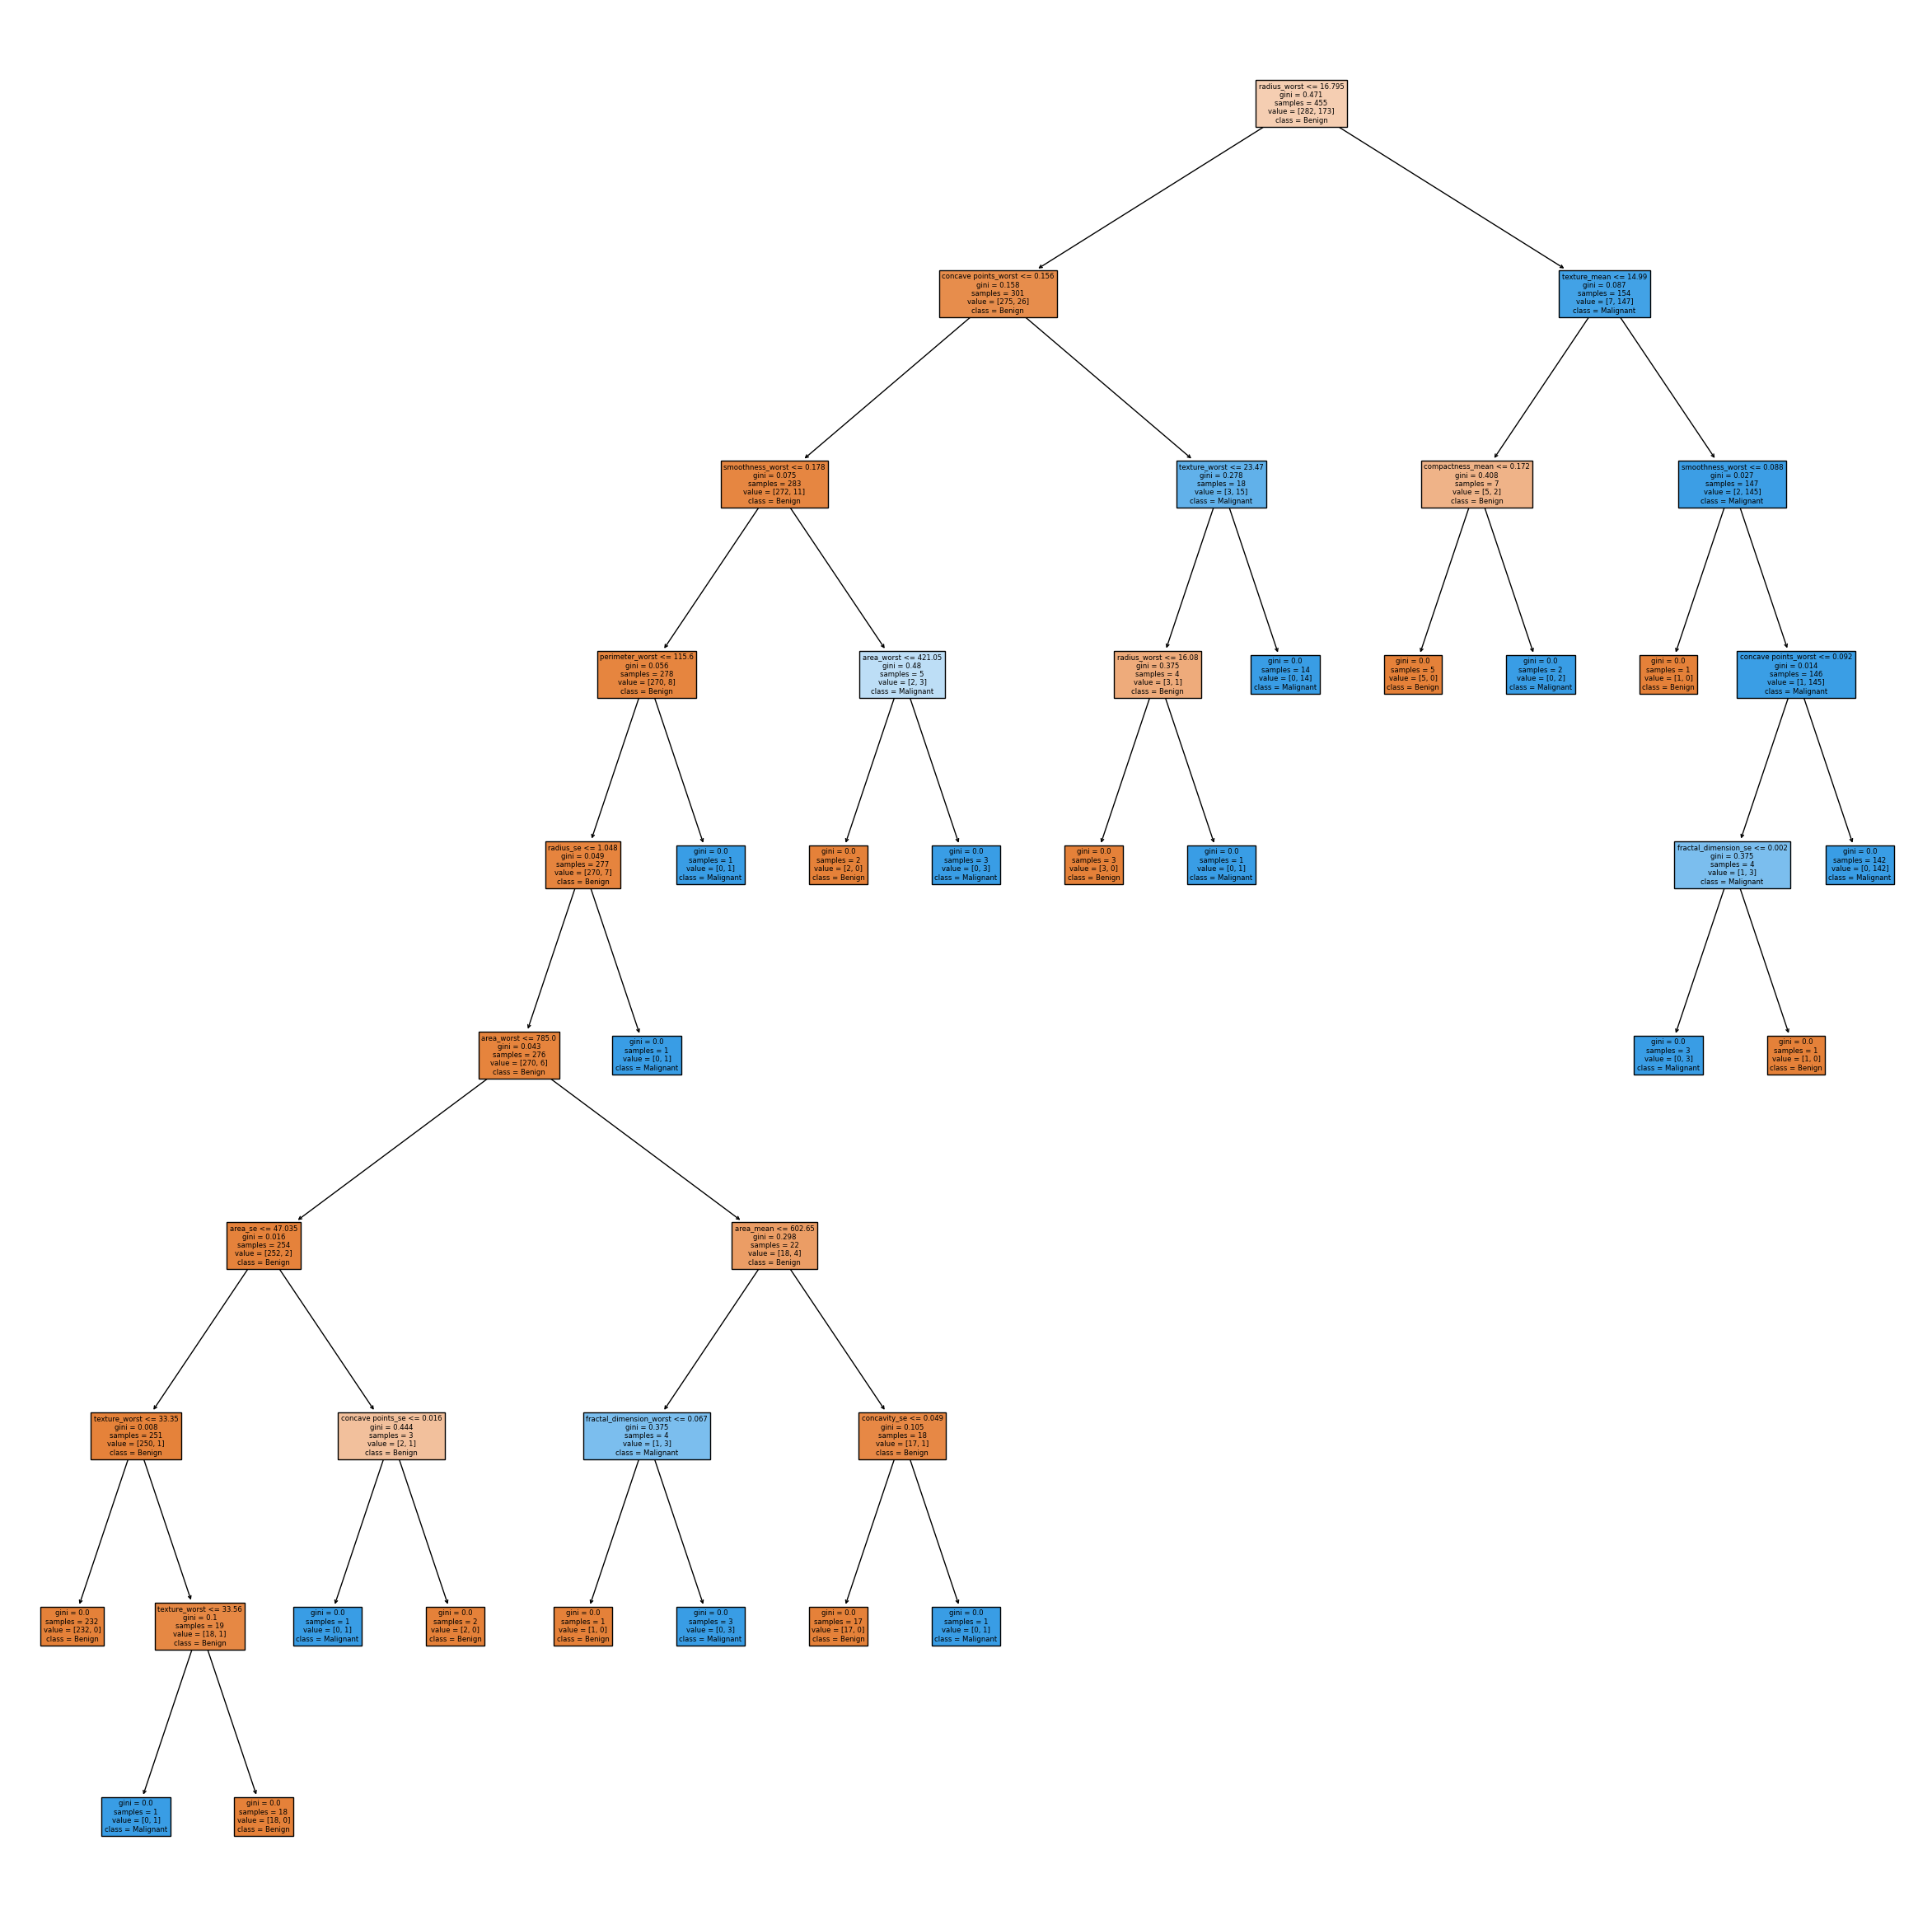

In [17]:
plt.figure(figsize=(30,30))
plot_tree(model, feature_names=feature_columns, class_names=['Benign', 'Malignant'], filled=True)
plt.show()

In [18]:
print(model.get_depth())
print(model.tree_.node_count)

9
43


In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
tahmin= knn.predict(x_test)

In [20]:
knn.score(x_test,y_test)

0.9210526315789473

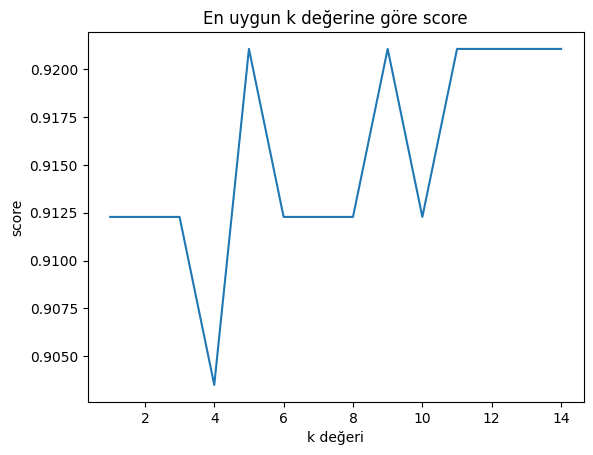

In [21]:
score_list=[]
for each in range(1,15):
    knn1= KNeighborsClassifier(n_neighbors=each)
    knn1.fit(x_train,y_train)
    score_list.append(knn1.score(x_test, y_test))
    
plt.title("En uygun k değerine göre score")
plt.plot(range(1,15),score_list)
plt.xlabel("k değeri")
plt.ylabel("score")
plt.show()

In [22]:
precision_knn = precision_score(y_test, tahmin)
recall_knn = recall_score(y_test, tahmin)
f1_knn = f1_score(y_test, tahmin)
error_rate_knn = 1 - accuracy_score(y_test, tahmin)

print("KNN Modeli Hata Metrikleri:")
print("Hassasiyet:", precision_knn)
print("Özgüllük:", recall_knn)
print("F1 Skoru:", f1_knn)
print("Hata Oranı:", error_rate_knn)

KNN Modeli Hata Metrikleri:
Hassasiyet: 0.9166666666666666
Özgüllük: 0.8461538461538461
F1 Skoru: 0.8799999999999999
Hata Oranı: 0.07894736842105265
